In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from pgen import utils
from pgen import hmmer
from pathlib import Path
import matplotlib.pyplot as plt
common_vars = utils.CommonVars()
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

In [38]:
common_vars
output_dir = Path(common_vars.project_dir) / "outputs" / "graphs"

In [19]:
HMM_paths = {"CM_2": Path(common_vars.project_dir) / "data"/ "CM_2.hmm", "Tautomerase": Path(common_vars.project_dir) / "data"/ "Tautomerase.hmm"}

In [20]:
HMM_tests = [("CM2_Trn","data/Russ_994_random.fasta","CM_2"),
("Russ","outputs/models/russ/russ_gen.fasta","CM_2"),
("CM2_Tst","data/Russ_226_random.fasta","CM_2"),
("Tau_Tst","data/tautomerase_738.fasta","CM_2"),
("1_S","outputs/models/ESM34/esm34_CH_2_e_coli_full_sequential_k0.fasta","CM_2"),
("1_R","outputs/models/ESM34/E_coli_parallel_esm34.fasta","CM_2"),
("1_B","outputs/models/ESM34/E_coli_parallel_burnin_esm34.fasta","CM_2"),
("1_C","outputs/models/ESM34/E_coli_CM2_first_20_2549bd_trial1.fasta","CM_2"),
("1_N","outputs/models/ESM34/NoSeed_2549bd_trial2.fasta","CM_2"),
("2_B","outputs/models/esm1_t12_85M_UR50S/E_coli_parallel_burnin_esm12.fasta","CM_2"),
("3_B","outputs/models/esm1_t12_85M_UR50S/finetuned/Russ_994_random/Dec04_13-47-23_6fb55ea4/generated_sequences/E_coli_CM2_6b9c30_trial5.fasta","CM_2"),
("3_C","outputs/models/esm1_t12_85M_UR50S/finetuned/Russ_994_random/Dec04_13-47-23_6fb55ea4/generated_sequences/E_coli_CM2_first_20_7d2781_trial1.fasta","CM_2"),
("3_N","outputs/models/esm1_t12_85M_UR50S/finetuned/Russ_994_random/Dec04_13-47-23_6fb55ea4/generated_sequences/NoSeed_83abbe_trial2.fasta","CM_2"),
("4_B","outputs/models/esm1_t12_85M_UR50S/finetuned/tautomerase_2953/Dec04_14-13-14_c8588459/generated_sequences/E_coli_CM2_bb1f59_trial5.fasta","CM_2"),
("5_B","outputs/models/ProtBert-BFD/E_coli_CM2_db515f_trial1.fasta","CM_2"),
("8_N","outputs/models/ProtBert12-Russ/russ_from_scratch_100_epochs_no_seed.fasta","CM_2"),
#("9_N","Outputs/models/ProtBert12-Russ/russ_from_scratch_300_epochs_no_seed.fasta","CM_2"),
("6_N","outputs/models/3_gram_CM_2/Russ_994_random_3gram_generation_seed_s_len92.fasta","CM_2"),
("HMM","outputs/models/hmmemit/Russ_994_hmmemit.fasta","CM_2"),
("Tau_Trn","data/tautomerase_2953.fasta","Tautomerase"),
("Tau_Tst","data/tautomerase_738.fasta","Tautomerase"),
("4_B","outputs/models/esm1_t12_85M_UR50S/finetuned/tautomerase_2953/Dec04_14-13-14_c8588459/generated_sequences/E_coli_CM2_bb1f59_trial5.fasta","Tautomerase"),
("4_N","outputs/models/esm1_t12_85M_UR50S/finetuned/tautomerase_2953/Dec04_14-13-14_c8588459/generated_sequences/NoSeed_30995f_trial2.fasta","Tautomerase"),
("7_N","outputs/models/3_gram_Tautomerase/tautomerase_2953_3gram_generation_seed_s_len60.fasta","Tautomerase")]

# HMM_tests = [("5_B","Outputs/models/ProtBert-BFD/E_coli_CM2_db515f_trial1.fasta","CM_2"),
             
# ("8_N","Outputs/models/ProtBert12-Russ/russ_from_scratch_100_epochs_no_seed.fasta","CM_2"),
# ("3_N","outputs/models/esm1_t12_85M_UR50S/finetuned/Russ_994_random/Dec04_13-47-23_6fb55ea4/generated_sequences/NoSeed_83abbe_trial2.fasta","CM_2"),
# ]

In [ ]:
hmm_results = list()
for t in HMM_tests:
    print(t[0])
    out = hmmer.get_hmm_scores(HMM_paths[t[2]], utils.parse_fasta(Path(common_vars.project_dir) / t[1]))
    hmm_results.append((t[0],t[2], out))

In [23]:
df = pd.DataFrame()
scores = list()
datasets = list()
for i,v in enumerate(hmm_results):
    T=""
    if v[1] == "Tautomerase":
        T="*"
    scores += v[2]
    datasets += [v[0] + T] * len(v[2])
df["Dataset"] = datasets
df["HMM Score"] = scores

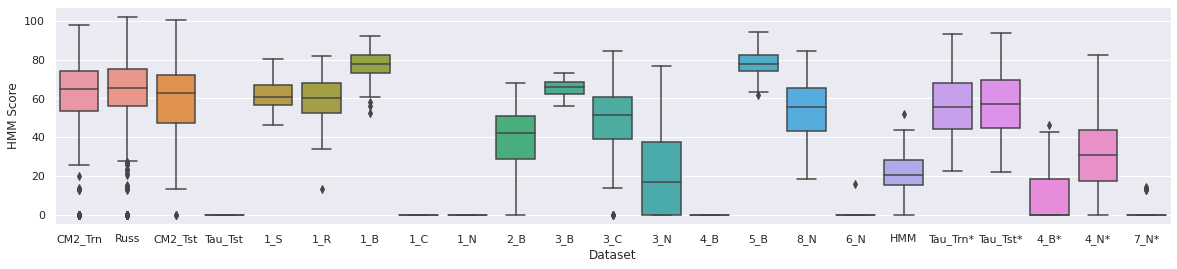

In [24]:
sns.set(rc={'figure.figsize':(20,4)})
#sns.set(rc={'figure.figsize':(5,4)})
ax = sns.boxplot(x="Dataset", y="HMM Score", data=df)

In [41]:
ax.figure.savefig(output_dir / "hmm_plot.png")

In [30]:
stats_comparison_datasets = [("CM2_Tst","data/Russ_226_random.fasta","CM2_Trn","data/Russ_994_random.fasta"),
("Russ","outputs/models/russ/russ_gen.fasta","CM2_Trn","data/Russ_994_random.fasta"),
("1_B","outputs/models/ESM34/E_coli_parallel_burnin_esm34.fasta","CM2_Trn","data/Russ_994_random.fasta"),
("2_B","outputs/models/esm1_t12_85M_UR50S/E_coli_parallel_burnin_esm12.fasta","CM2_Trn","data/Russ_994_random.fasta"),
("3_C","outputs/models/esm1_t12_85M_UR50S/finetuned/Russ_994_random/Dec04_13-47-23_6fb55ea4/generated_sequences/E_coli_CM2_first_20_7d2781_trial1.fasta","CM2_Trn","data/Russ_994_random.fasta"),
("8_N","Outputs/models/ProtBert12-Russ/russ_from_scratch_100_epochs_no_seed.fasta","CM2_Trn","data/Russ_994_random.fasta"),
("5_B","Outputs/models/ProtBert-BFD/E_coli_CM2_db515f_trial1.fasta","CM2_Trn","data/Russ_994_random.fasta"),
("HMM","outputs/models/hmmemit/Russ_994_hmmemit.fasta","CM2_Trn","data/Russ_994_random.fasta"),
("5_B","Outputs/models/ProtBert-BFD/E_coli_CM2_db515f_trial1.fasta","1_B","outputs/models/ESM34/E_coli_parallel_burnin_esm34.fasta")]


In [34]:
stats_comparisons_mat = list()
for r in stats_comparison_datasets:
    print(r)
    stat_seqs = { r[0]: utils.parse_fasta(Path(common_vars.project_dir) / r[1]), r[2]:  utils.parse_fasta(Path(common_vars.project_dir) / r[3]) }
    aln_names, aln_seqs = utils.generate_alignment(stat_seqs, "/tmp")
    print("aln")
    fos_1 = utils.msa_to_frequencies(aln_names, aln_seqs, r[0])
    sos_1 = utils.msa_to_second_order_statistics(aln_names, aln_seqs, r[0])
    sos_cor_1 = utils.second_order_correlations(fos_1, sos_1)
   
    fos_2 = utils.msa_to_frequencies(aln_names, aln_seqs, r[2])
    sos_2 = utils.msa_to_second_order_statistics(aln_names, aln_seqs, r[2])
    sos_cor_2 = utils.second_order_correlations(fos_2, sos_2)
    
    stats_comparisons_mat.append([ [r[0],fos_1,sos_1,sos_cor_1], [r[2],fos_2,sos_2,sos_cor_2] ]) 

('CM2_Tst', 'data/Russ_226_random.fasta', 'CM2_Trn', 'data/Russ_994_random.fasta')
aln
('Russ', 'outputs/models/russ/russ_gen.fasta', 'CM2_Trn', 'data/Russ_994_random.fasta')
aln
('1_B', 'outputs/models/ESM34/E_coli_parallel_burnin_esm34.fasta', 'CM2_Trn', 'data/Russ_994_random.fasta')
aln
('2_B', 'outputs/models/esm1_t12_85M_UR50S/E_coli_parallel_burnin_esm12.fasta', 'CM2_Trn', 'data/Russ_994_random.fasta')
aln
('3_C', 'outputs/models/esm1_t12_85M_UR50S/finetuned/Russ_994_random/Dec04_13-47-23_6fb55ea4/generated_sequences/E_coli_CM2_first_20_7d2781_trial1.fasta', 'CM2_Trn', 'data/Russ_994_random.fasta')
aln
('8_N', 'Outputs/models/ProtBert12-Russ/russ_from_scratch_100_epochs_no_seed.fasta', 'CM2_Trn', 'data/Russ_994_random.fasta')
aln
('5_B', 'Outputs/models/ProtBert-BFD/E_coli_CM2_db515f_trial1.fasta', 'CM2_Trn', 'data/Russ_994_random.fasta')
aln
('HMM', 'outputs/models/hmmemit/Russ_994_hmmemit.fasta', 'CM2_Trn', 'data/Russ_994_random.fasta')
aln
('5_B', 'Outputs/models/ProtBert-BFD/

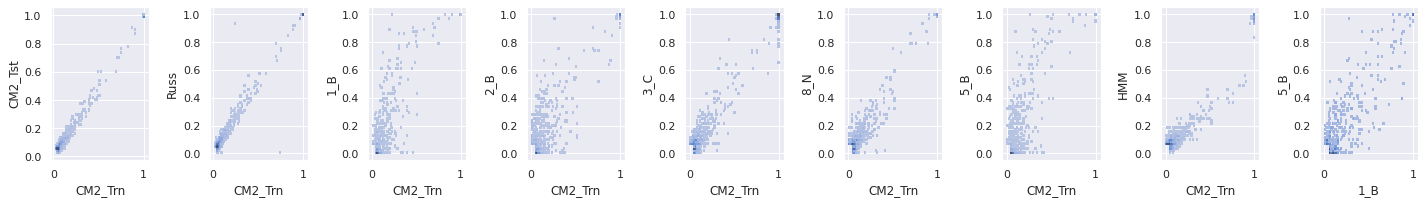

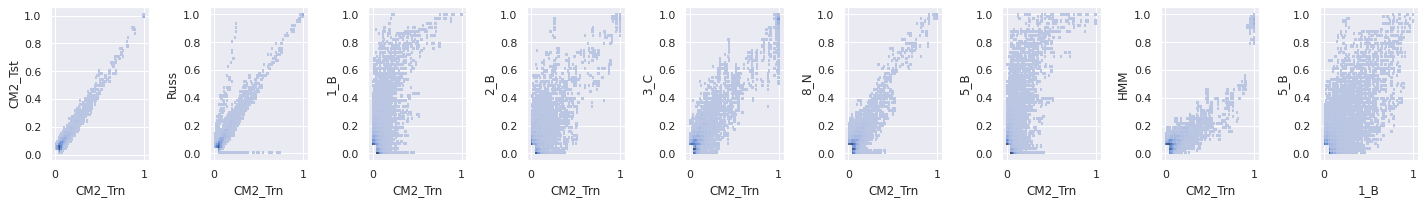

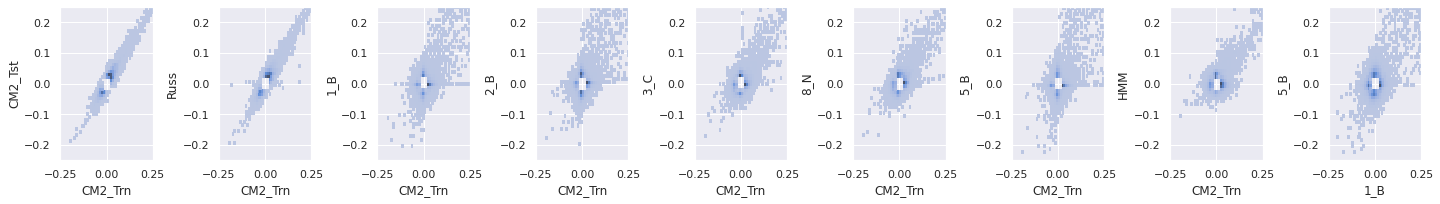

In [44]:
sns.set_theme()
delta = 0.05
filtered = list()
fig_fos, axs_fos = plt.subplots(ncols=len(stats_comparisons_mat),figsize=(20,3))
fig_sos, axs_sos = plt.subplots(ncols=len(stats_comparisons_mat),figsize=(20,3))
fig_sos_cor, axs_sos_cor = plt.subplots(ncols=len(stats_comparisons_mat),figsize=(20,3))

for (i,r) in enumerate(stats_comparisons_mat):
    fos_1 = r[0][1].flatten()
    fos_2 = r[1][1].flatten()
    fos_1_filtered = fos_1[ (fos_1 > delta) | (fos_2 > delta) ]
    fos_2_filtered = fos_2[ (fos_1 > delta) | (fos_2 > delta) ]
    
    sos_1 = r[0][2].flatten()
    sos_2 = r[1][2].flatten()
    sos_1_filtered = sos_1[ (sos_1 > delta) | (sos_2 > delta) ]
    sos_2_filtered = sos_2[ (sos_1 > delta) | (sos_2 > delta) ]
    
    sos_1_cor = r[0][3].flatten()
    sos_2_cor = r[1][3].flatten()
    sos_1_cor_filtered = sos_1_cor[ (np.abs(sos_1_cor) > delta/2) | (np.abs(sos_2_cor) > delta/2) ]
    sos_2_cor_filtered = sos_2_cor[ (np.abs(sos_1_cor) > delta/2) | (np.abs(sos_2_cor) > delta/2) ]

    sns.histplot(x=fos_2_filtered, y=fos_1_filtered, binwidth=(0.015, .015), ax=axs_fos[i])
    sns.histplot(x=sos_2_filtered, y=sos_1_filtered, binwidth=(0.015, .015), ax=axs_sos[i])
    sns.histplot(x=sos_2_cor_filtered, y=sos_1_cor_filtered, binwidth=(0.01, .01), ax=axs_sos_cor[i])
    axs_fos[i].set_xlabel(r[1][0])
    axs_fos[i].set_ylabel(r[0][0])
    axs_sos[i].set_xlabel(r[1][0])
    axs_sos[i].set_ylabel(r[0][0])
    axs_sos_cor[i].set_xlabel(r[1][0])
    axs_sos_cor[i].set_ylabel(r[0][0])
    axs_sos_cor[i].set_xlim([-0.25, 0.25])
    axs_sos_cor[i].set_ylim([-0.25, 0.25])
fig_fos.tight_layout()
fig_sos.tight_layout()
fig_sos_cor.tight_layout()
fig_fos.savefig(output_dir / "fos_plot.png")
fig_sos.savefig(output_dir / "sos_plot.png")
fig_sos_cor.savefig(output_dir / "sos_cor_plot.png")

